In [37]:
def kromaticni_indeks_metoda_2(snark):
    """
    Preveri, ali uvedba 4-ciklov v snarku ohranja kromatični indeks.
    :param graph: Sage graf, ki predstavlja snark.
    :return: Tuple (True/False, chromatic_index), kjer True pomeni, da kromatični indeks ostane enak,
             False pomeni, da se spremeni, in chromatic_index je kromatični indeks spremenjenega grafa.
    """
    originalni_krom_indeks = snark.chromatic_index()
    povezave = snark.edges()

    for povezava in povezave:
        # Pridobi vozlišča a in b iz roba
        a, b = povezava[:2]
        
        # Pridobi sosede a in b (brez medsebojnih povezav)
        sosedi_a = [v for v in snark.neighbors(a) if v != b]
        sosedi_b = [v for v in snark.neighbors(b) if v != a]

        if len(sosedi_a) != 2 or len(sosedi_b) != 2:
            raise ValueError("Vozlišči a in b nimata točno dveh drugih sosedov.")

        a1, a2 = sosedi_a
        b1, b2 = sosedi_b

        # Ustvari kopijo grafa in odstrani vozlišča a in b
        # novi_graf = snark.copy()
        snark.delete_vertices([a, b])
        
        a1_, a2_ = "a1'", "a2'"
        b1_, b2_ = "b1'", "b2'"
        snark.add_vertices([a1_, a2_, b1_, b2_])
        snark.add_edge(a1, a1_)
        snark.add_edge(a2, a2_)
        snark.add_edge(b1, b1_)
        snark.add_edge(b2, b2_)
        
        cikel4 = [a1_, b1_, a2_, b2_]
        snark.add_edges([(cikel4[i], cikel4[(i + 1) % 4]) for i in range(4)])

        # Preveri kromatični indeks novega grafa
        novi_krom_indeks = snark.chromatic_index()
        if novi_krom_indeks != originalni_krom_indeks:
            return False, novi_krom_indeks

    return True, originalni_krom_indeks

In [38]:
celmins_swart_snark_1 = Graph({0: [1, 2, 3], 1: [0, 23, 25], 2: [0, 21, 24], 3: [0, 20, 22],4: [8, 12, 14], 5: [6, 8, 13], 6: [5, 9, 14], 7: [10, 11, 15],8: [4, 5, 18], 9: [6, 10, 18], 10: [7, 9, 17], 11: [7, 19, 22],12: [4, 13, 25], 13: [5, 12, 21], 14: [4, 6, 21], 15: [7, 16, 20],16: [15, 17, 22], 17: [10, 16, 23], 18: [8, 9, 23], 19: [11, 20, 24],20: [3, 15, 19], 21: [2, 13, 14], 22: [3, 11, 16], 23: [1, 17, 18],24: [2, 19, 25], 25: [1, 12, 24]})

double_star_snark = Graph({0: [1, 2, 3], 1: [0, 24, 27], 2: [0, 26, 29], 3: [0, 25, 28],4: [7, 8, 15], 5: [6, 11, 14], 6: [5, 10, 15], 7: [4, 9, 14],8: [4, 12, 16], 9: [7, 13, 17], 10: [6, 12, 17], 11: [5, 13, 16],12: [8, 10, 20], 13: [9, 11, 21], 14: [5, 7, 26], 15: [4, 6, 25],16: [8, 11, 27], 17: [9, 10, 27], 18: [21, 23, 29], 19: [20, 22, 28],20: [12, 19, 29], 21: [13, 18, 28], 22: [19, 24, 26], 23: [18, 24, 25],24: [1, 22, 23], 25: [3, 15, 23], 26: [2, 14, 22], 27: [1, 16, 17],28: [3, 19, 21], 29: [2, 18, 20]})

flower_snark_j7 = Graph({0: [1, 2, 3], 1: [0, 22, 23], 2: [0, 25, 27], 3: [0, 24, 26],4: [7, 8, 12], 5: [6, 9, 12], 6: [5, 11, 13], 7: [4, 10, 13],8: [4, 14, 18], 9: [5, 14, 21], 10: [7, 15, 20], 11: [6, 15, 19],12: [4, 5, 17], 13: [6, 7, 16], 14: [8, 9, 26], 15: [10, 11, 27],16: [13, 17, 27], 17: [12, 16, 26], 18: [8, 22, 24], 19: [11, 22, 25],20: [10, 23, 25], 21: [9, 23, 24], 22: [1, 18, 19], 23: [1, 20, 21],24: [3, 18, 21], 25: [2, 19, 20], 26: [3, 14, 17], 27: [2, 15, 16]})

goldberg_snark_3 = Graph({0: [1, 2, 3], 1: [0, 18, 20], 2: [0, 19, 21], 3: [0, 22, 23], 4: [5, 8, 13],5: [4, 9, 14], 6: [7, 10, 15], 7: [6, 11, 12], 8: [4, 12, 16],9: [5, 15, 17], 10: [6, 14, 17], 11: [7, 13, 16], 12: [7, 8, 21],13: [4, 11, 18], 14: [5, 10, 19], 15: [6, 9, 20], 16: [8, 11, 23],19: [9, 10, 22], 18: [1, 13, 19], 19: [2, 14, 18], 20: [1, 15, 21],21: [2, 12, 20], 22: [3, 17, 23], 23: [3, 16, 22]})

goldberg_snark_5 = Graph({0: [1, 2, 3], 1: [0, 34, 39], 2: [0, 35, 37], 3: [0, 36, 38],4: [26, 27, 33], 5: [24, 25, 32], 6: [22, 23, 25], 7: [13, 14, 24],8: [23, 30, 31], 9: [10, 11, 22], 10: [11, 18, 21], 11: [9, 19, 20],12: [13, 16, 27], 13: [7, 12, 15], 14: [7, 16, 28], 15: [13, 19, 28],16: [12, 14, 21], 17: [20, 29, 30], 18: [10, 19, 31], 19: [11, 15, 18],20: [11, 17, 21], 21: [10, 16, 20], 22: [6, 9, 24], 23: [6, 8, 29],24: [5, 7, 22], 25: [5, 6, 39], 26: [4, 32, 37], 27: [4, 12, 35],28: [14, 15, 37], 29: [17, 23, 36], 30: [8, 17, 34], 31: [8, 18, 36],32: [5, 26, 35], 33: [4, 34, 38], 34: [1, 30, 33], 35: [2, 27, 32],36: [3, 29, 31], 37: [2, 26, 28], 38: [3, 33, 39], 39: [1, 25, 38]})

loupekines_snark_1 = Graph({0: [1, 2, 3], 1: [0, 16, 21], 2: [0, 18, 20], 3: [0, 17, 19],4: [10, 12, 14], 5: [11, 13, 15], 6: [9, 12, 15], 7: [8, 13, 14],8: [7, 10, 16], 9: [6, 11, 16], 10: [4, 8, 17], 11: [5, 9, 18],12: [4, 6, 18], 13: [5, 7, 17], 14: [4, 7, 20], 15: [5, 6, 19],16: [1, 8, 9], 17: [3, 10, 13], 18: [2, 11, 12], 19: [3, 15, 21],20: [2, 14, 21], 21: [1, 19, 20]})

loupekines_snark_2 = Graph({0: [1, 2, 3], 1: [0, 16, 21], 2: [0, 18, 20], 3: [0, 17, 19],4: [8, 10, 14], 5: [9, 11, 15], 6: [7, 12, 15], 7: [6, 13, 14],8: [4, 13, 16], 9: [5, 12, 16], 10: [4, 11, 17], 11: [5, 10, 18],12: [6, 9, 18], 13: [7, 8, 17], 14: [4, 7, 20], 15: [5, 6, 19],16: [1, 8, 9], 17: [3, 10, 13], 18: [2, 11, 12], 19: [3, 15, 21],20: [2, 14, 21], 21: [1, 19, 20]})

G = graphs.PetersenGraph()

In [39]:
kromaticni_indeks_metoda_2(double_star_snark)

(False, 3)

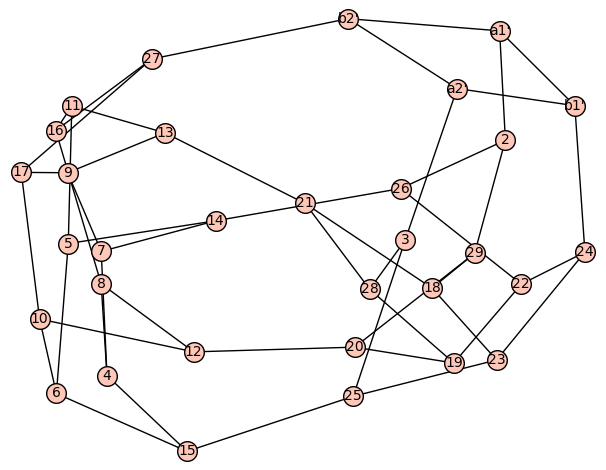

In [40]:
double_star_snark.plot()